# WeatherPy
----

#### Analysis
* From the max temp vs latitude linear regression plots for both the northen and southern hemispheres we can infer that the closer to the equator the higher the temperature gets since latitude has a moderate relationship with temperature. This is due to the fact that the sun's rays hit the earth's surface at a higher angle at the equator.
* From the linear regresion plots we can see that latitude has no correlation on wind speed and cloudiness. Thus no matter where you are in your latitude we are not able to tell how cloudy and how much wind speed there could be. This is because wind speed is the movement of air and cloudiness is just the measure of how much the sky is covered in clouds.
* Although the scatter plots for humidty show that there is a weak positive relationship between latitude and humidity we can see that even though it is weak the latitude does slightly impact the humidity level. We can see that there is more humidity closer to the equator. This is true because the closer to the equator the hotter the temperature and the hotter the air is, the more water it can contain. Increasing the likeliness of water vapor and humidity.

In [1]:
#Import Dependencies, API Key & Citypy
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import json
import random
import numpy as np
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
#Create lists to hold latitude, longitude and cities
lat_lngl=[]
citiesl=[]

#Create random latitude and longitudes
latr=np.random.uniform(-90.00, 90.00, size =1500)
lngr=np.random.uniform(-180.00, 180.00, size =1500)
list_latlng=list(zip(latr,lngr))

In [3]:
#Loop through the data to find the nearest city by longitude and latitude
for lat_and_lng in list_latlng:
    city = citipy.nearest_city(lat_and_lng[0],lat_and_lng[1])
    city_name=city.city_name
    if city_name not in citiesl:
        citiesl.append(city_name)
len(citiesl)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Do a weather check using API calls
url = "http://api.openweathermap.org/data/2.5/weather?"

#Create the lists to hold the respective data
City=[]
Lat=[]
Lng=[]
Max_Temp=[] 
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

#Choose the type of units
units="imperial"

#Create the url with the data to search
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Loop through the cities by requesting the data and adding it to the lists created above
for city_name in citiesl:
    weather_response=requests.get(query_url+city_name).json()
    try:
#         query_url = f"{url}appid={weather_api_key}&units={units}"
#         weather_response=requests.get(query_url)
#         weather_response=requests.get(query_url+city_name).json()
        City.append(weather_response['name'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Humidity.append(weather_response['main']['humidity'])
        Cloudiness.append(weather_response['clouds']['all'])
        Wind_Speed.append(weather_response['wind']['speed'])
        Country.append(weather_response['sys']['country'])
        Date.append(weather_response['dt'])
        print(f"Processing Record 1 of Set 1 | {city_name}")    
        
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Processing Record 1 of Set 1 | chapais
Processing Record 1 of Set 1 | puerto carreno
City not found. Skipping...
Processing Record 1 of Set 1 | yellowknife
Processing Record 1 of Set 1 | barrow
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 1 of Set 1 | high level
Processing Record 1 of Set 1 | nioro
Processing Record 1 of Set 1 | clyde river
Processing Record 1 of Set 1 | bluff
Processing Record 1 of Set 1 | punta arenas
Processing Record 1 of Set 1 | mataura
Processing Record 1 of Set 1 | saint-philippe
Processing Record 1 of Set 1 | bambous virieux
Processing Record 1 of Set 1 | mahebourg
Processing Record 1 of Set 1 | shiyan
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | salekhard
Processing Record 1 of Set 1 | maniitsoq
Processing Record 1 of Set 1 | goure
City not found. Skipping...
Processing Record 1 of Set 1 | salalah
Processing Record 1 of Set 1 | ribeira grande
Processing Record 1 of Set 1 | cape town
Processing Recor

Processing Record 1 of Set 1 | mandalgovi
Processing Record 1 of Set 1 | saint-joseph
Processing Record 1 of Set 1 | taksimo
Processing Record 1 of Set 1 | alenquer
Processing Record 1 of Set 1 | kudahuvadhoo
Processing Record 1 of Set 1 | tahoua
Processing Record 1 of Set 1 | kirakira
Processing Record 1 of Set 1 | carahue
Processing Record 1 of Set 1 | vestmannaeyjar
City not found. Skipping...
Processing Record 1 of Set 1 | carbonia
Processing Record 1 of Set 1 | kloulklubed
Processing Record 1 of Set 1 | portland
Processing Record 1 of Set 1 | xuanzhou
Processing Record 1 of Set 1 | port keats
Processing Record 1 of Set 1 | krasnoselkup
City not found. Skipping...
Processing Record 1 of Set 1 | muzhi
Processing Record 1 of Set 1 | rocha
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 1 of Set 1 | durban
Processing Record 1 of Set 1 | ilulissat
Processing Record 1 of Set 1 | jiuquan
Processing Record 1 of Set 1 | meulaboh
Processing Record 1 of Set 1 | sungaipenuh
Pr

Processing Record 1 of Set 1 | egvekinot
Processing Record 1 of Set 1 | mercedes
Processing Record 1 of Set 1 | coahuayana
Processing Record 1 of Set 1 | shingu
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | morant bay
Processing Record 1 of Set 1 | plastun
Processing Record 1 of Set 1 | tual
Processing Record 1 of Set 1 | izhmorskiy
Processing Record 1 of Set 1 | danville
Processing Record 1 of Set 1 | tsumeb
Processing Record 1 of Set 1 | codrington
Processing Record 1 of Set 1 | jinchang
Processing Record 1 of Set 1 | fort nelson
Processing Record 1 of Set 1 | dali
Processing Record 1 of Set 1 | san quintin
Processing Record 1 of Set 1 | balkanabat
Processing Record 1 of Set 1 | kurilsk
Processing Record 1 of Set 1 | zverinogolovskoye
Processing Record 1 of Set 1 | gorontalo
Processing Record 1 of Set 1 | dumas
Processing Record 1 of Set 1 | koslan
Processing Record 1 of Set 1 | fort morgan
Processing Record 1 of Set 1 | moron
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a dictionary with the keys and values to create a data frame
weather_data={'City': City,
'Latitude':Lat,
'Longitude':Lng,
'Max Temp': Max_Temp,
'Humidity': Humidity,
'Cloudiness': Cloudiness,
'Wind_Speed': Wind_Speed,
'Country': Country,
'Date': Date}

#Create data frame
df=pd.DataFrame(weather_data)
df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Chapais,49.78,-74.85,50.00,93,90,5.82,CA,1601448032
1,Puerto Carreño,6.19,-67.49,76.82,91,75,4.72,CO,1601448032
2,Yellowknife,62.46,-114.35,37.40,100,20,6.93,CA,1601447943
3,Barrow,71.29,-156.79,32.00,98,90,9.17,US,1601448033
4,Arraial do Cabo,-22.97,-42.03,72.79,91,36,10.27,BR,1601447791
...,...,...,...,...,...,...,...,...,...
553,Alta Floresta,-9.88,-56.09,76.28,56,100,3.18,BR,1601448578
554,Kinkala,-4.36,14.76,73.40,83,63,4.70,CG,1601448579
555,Khammam,17.25,80.15,83.88,79,100,7.92,IN,1601448579
556,Dekar,-21.53,21.93,74.10,27,0,12.77,BW,1601448580


In [6]:
df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.323674,17.805663,63.858925,71.897849,52.154122,7.993584,1.601448e+09
std,34.034348,88.062119,16.374638,21.180475,40.288117,5.622506,1.603648e+02
min,-54.800000,-179.170000,14.000000,11.000000,0.000000,0.430000,1.601448e+09
25%,-8.765000,-59.257500,52.372500,62.000000,5.000000,3.965000,1.601448e+09
50%,21.085000,20.830000,64.000000,77.000000,57.000000,6.815000,1.601448e+09
75%,47.597500,94.860000,78.427500,87.000000,92.750000,10.450000,1.601448e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,31.160000,1.601449e+09


In [7]:
#Export the city data into a csv file
df.to_csv("WeatherPy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# already did the summary stat frame and there are no cities with humidty with greater than 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

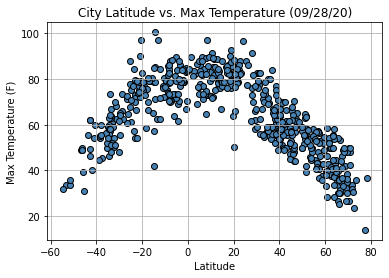

In [9]:
#Creat a scatter plot using the data frame created
lati=df['Latitude']
maxtemp=df['Max Temp']
plt.scatter(lati, maxtemp, edgecolors="black",facecolors="steelblue")
plt.title('City Latitude vs. Max Temperature (09/28/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("City Lat vs Wind Speed.png")
plt.show()

In [10]:
print('Highest temperature was found in the Northern Hemisphere. As the latitude decreases and increases the temperature decreases')

Highest temperature was found in the Northern Hemisphere. As the latitude decreases and increases the temperature decreases


## Latitude vs. Humidity Plot

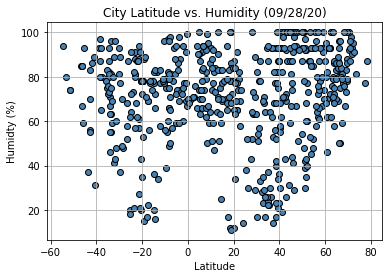

In [11]:
#Creat a scatter plot 
lati=df['Latitude']
hum=df['Humidity']
plt.scatter(lati, hum, edgecolors="black",facecolors="steelblue")
plt.title('City Latitude vs. Humidity (09/28/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.grid()
plt.savefig("City Lat vs Humidity.png")
plt.show()

In [12]:
print('Humidity is dispersed throughout the latitudes. Humidty is mostly low between the Northern and Southern Hemisphere with latitudes between: (-40 & -20) and (20-40)')

Humidity is dispersed throughout the latitudes. Humidty is mostly low between the Northern and Southern Hemisphere with latitudes between: (-40 & -20) and (20-40)


## Latitude vs. Cloudiness Plot

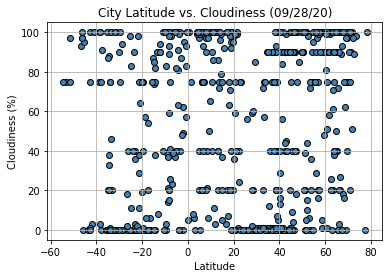

In [13]:
#Create plot
lati=df['Latitude']
cl=df['Cloudiness']
plt.scatter(lati, cl, edgecolors="black",facecolors="steelblue")
plt.title('City Latitude vs. Cloudiness (09/28/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("City Lat vs Cloudiness.png")
plt.show()

In [14]:
print('Cloudiness is dispersed all over the latitudes')

Cloudiness is dispersed all over the latitudes


## Latitude vs. Wind Speed Plot

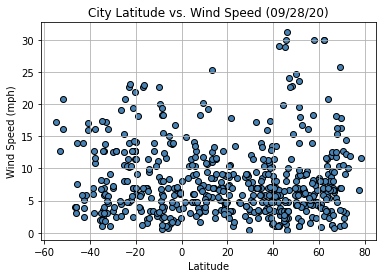

In [15]:
#Create plot
lati=df['Latitude']
ws=df['Wind_Speed']
plt.scatter(lati, ws, edgecolors="black",facecolors="steelblue")
plt.title('City Latitude vs. Wind Speed (09/28/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("City Lat vs Wind Speed.png")
plt.show()

In [16]:
print('Wind speed is dispersed all over the latitudes. Remaining mostly between 0-10 mph')

Wind speed is dispersed all over the latitudes. Remaining mostly between 0-10 mph


## Linear Regression

In [17]:
#Filter the data frame to only include the northern hemisphere
north=df.loc[df['Latitude']>=0,:]

#Filter the data frame to only include the southern hemisphere
south=df.loc[df['Latitude']<=0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7786968087807733


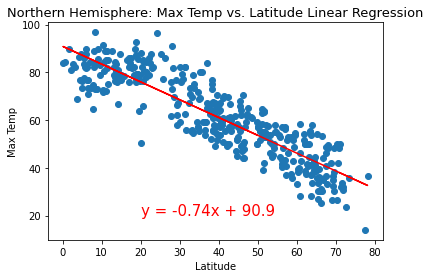

In [18]:
#Plot the scatter plot with the regression line
y_values=north['Max Temp']
x_values=north['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Max Temp', fontsize =10)
plt.title('Northern Hemisphere: Max Temp vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Max Temp vs Lat Lnr Reg.png")
plt.show()

In [19]:
print('There is a moderate negative correlation between latitude and maximum temperature in the northern hemisphere')

There is a moderate negative correlation between latitude and maximum temperature in the northern hemisphere


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5849790215743731


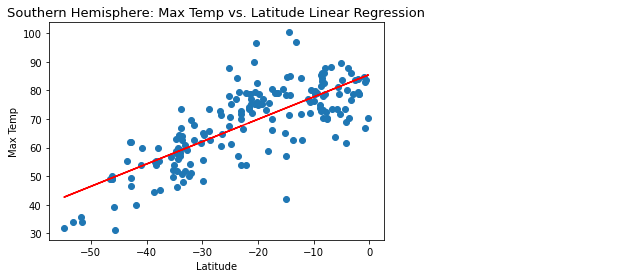

In [20]:
#Plot the scatter plot with the regression line
y_values=south['Max Temp']
x_values=south['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Max Temp', fontsize =10)
plt.title('Southern Hemisphere: Max Temp vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("South Max Temp vs Lat Lnr Reg.png")
plt.show()

In [21]:
print('There is a moderate positive correlation between latitude and max temperature in the southern hemisphere')

There is a moderate positive correlation between latitude and max temperature in the southern hemisphere


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.026960334107087817


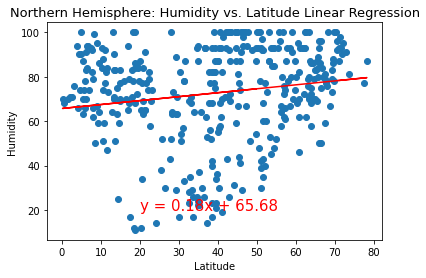

In [22]:
#Plot the scatter plot with the regression line
y_values=north['Humidity']
x_values=north['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Humidity', fontsize =10)
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Humidity vs Lat Lnr Reg.png")
plt.show()

In [23]:
print('There is a weak positive correlation between latitude and humidity in the northern hemisphere')

There is a weak positive correlation between latitude and humidity in the northern hemisphere


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00017132346275866724


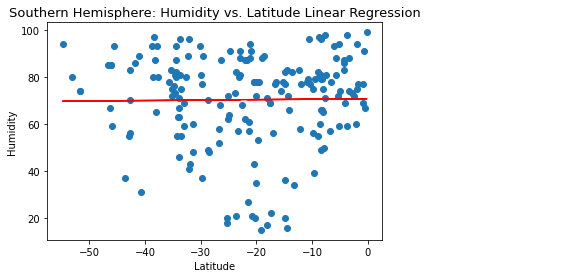

In [24]:
#Plot the scatter plot with the regression line
y_values=south['Humidity']
x_values=south['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Humidity', fontsize =10)
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("South Humidity vs Lat Lnr Reg.png")
plt.show()

In [25]:
print('There is a weak positive correlation between latitude and humidity in the southern hemisphere')

There is a weak positive correlation between latitude and humidity in the southern hemisphere


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007872134918605184


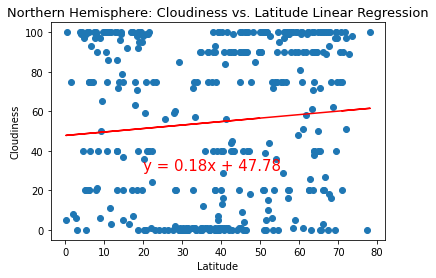

In [26]:
#Plot the scatter plot with the regression line
y_values=north['Cloudiness']
x_values=north['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Cloudiness', fontsize =10)
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Cloud vs Lat Lnr Reg.png")
plt.show()

In [27]:
print('The points between latitude and cloudiness in the northern hemisphere are \
      random and there is no relationship between them')

The points between latitude and cloudiness in the northern hemisphere are       random and there is no relationship between them


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007255915096214807


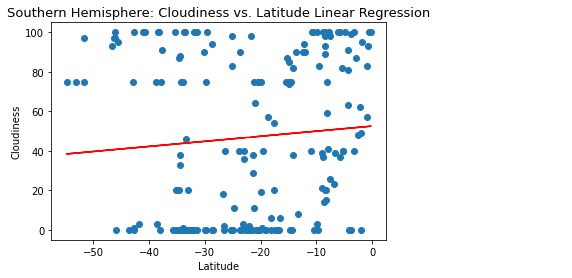

In [28]:
#Plot the scatter plot with the regression line
y_values=south['Cloudiness']
x_values=south['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Cloudiness', fontsize =10)
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("South Cloud vs Lat Lnr Reg.png")
plt.show()

In [29]:
print('There is a weak positive correlation between latitude and cloudiness in the southern hemisphere')

There is a weak positive correlation between latitude and cloudiness in the southern hemisphere


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004592445998387079


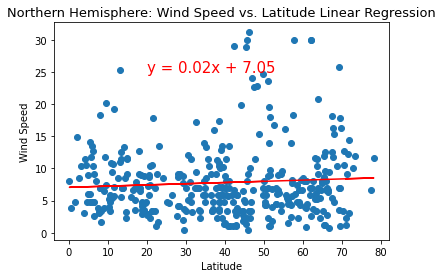

In [30]:
#Plot the scatter plot with the regression line
y_values=north['Wind_Speed']
x_values=north['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Wind Speed', fontsize =10)
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Wind Speed vs Lat Lnr Reg.png")
plt.show()

In [31]:
print('There is a weak positive correlation between latitude and wind speed in the northern hemisphere')

There is a weak positive correlation between latitude and wind speed in the northern hemisphere


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006401038931820438


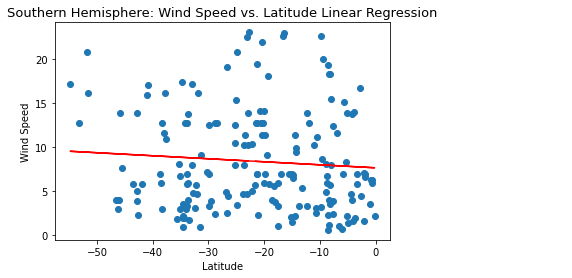

In [32]:
#Plot the scatter plot with the regression line
y_values=south['Wind_Speed']
x_values=south['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Wind Speed', fontsize =10)
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("South Wind Speed vs Lat Lnr Reg.png")
plt.show()

In [33]:
print('There is a weak negative correlation between latitude and wind speed in the southern hemisphere')

There is a weak negative correlation between latitude and wind speed in the southern hemisphere
